In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 输入数据
# 原来X的3个特征分别为：x0,x1,x2
# X = np.array([[1,0,0],
#               [1,0,1],
#               [1,1,0],  
#               [1,1,1]])

# 给网络输入非线性特征
# 现在X的6个特征分别为：x0,x1,x2,x1×x1,x1×x2,x2×x2
X = np.array([[1,0,0,0,0,0],
              [1,0,1,0,0,1],
              [1,1,0,1,0,0],
              [1,1,1,1,1,1]])

# 标签，分别对应4种异或情况的结果
T = np.array([[-1],
              [1],
              [1],
              [-1]])

# 权值初始化，6行1列
# np.random.random可以生成0-1的随机数
W = np.random.random([6,1])
# 学习率设置
lr = 0.1
# 神经网络输出
Y = 0

# 更新一次权值
def train():
    # 使用全局变量X,Y,W,lr
    global X,Y,W,lr
    # 计算网络预测值
    Y = np.dot(X,W)
    # 计算权值的改变
    delta_W = lr * (X.T.dot(T - Y)) / X.shape[0]
    # 更新权值
    W += delta_W

[[-1.]
 [ 1.]
 [ 1.]
 [-1.]]


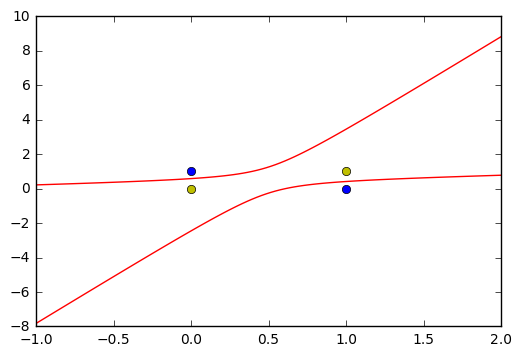

In [7]:
# 训练1000次
for _ in range(1000):
    train()

# 计算模型预测结果并打印
Y = np.dot(X,W)
print(Y)

#————————以下为画图部分————————#
# 正样本
x1 = [0,1]
y1 = [1,0]
# 负样本
x2 = [0,1]
y2 = [0,1]

# 因为正负样本的分界是0，所以分界线的表达式可以写成：
# w0x0 + w1x1 + w2x2 + w3x1x1 + w4x1x2 + w5x2x2 = 0
# 其中x0为1，我们可以把x1，x2分别看成是平面坐标系中的x和y
# 可以得到：w0 + w1x + w2y + w3xx + w4xy + w5yy = 0
# 整理可得：w5y² + (w2+w4x)y + w0 + w1x + w3x² = 0
# 其中 a = w5, b = w2+w4x, c = w0 + w1x + w3x²
# 根据一元二次方程的求根公式：ay²+by+c=0，y=[-b±(b^2-4ac)^(1/2)]/2a
def calculate(x,root):
    # 定义参数
    a = W[5]
    b = W[2] + x * W[4]
    c = W[0] + x * W[1] + x * x * W[3]
    # 有两个根
    if root == 1:
        return (- b + np.sqrt(b * b - 4 * a * c)) / (2 * a)
    if root == 2:
        return (- b - np.sqrt(b * b - 4 * a * c)) / (2 * a)
    
# 从-1到2之间均匀生成100个点
xdata = np.linspace(-1,2,100)
# 使用第一个求根公式计算出来的结果画出第一条红线
plt.plot(xdata,calculate(xdata,1),'r')
# 使用第二个求根公式计算出来的结果画出第二条红线
plt.plot(xdata,calculate(xdata,2),'r')
# 蓝色点表示正样本
plt.plot(x1,y1,'bo')
# 黄色点表示负样本
plt.plot(x2,y2,'yo')
# 绘图
plt.show()